![zebrains_logo](../../images/logo-zebrains-dark.svg)
## Кафедра «Интеллектуальных технологий в информационных системах»

### Лабораторная работа 3: scikit-learn; Введение в машинное обучение

![](../../images/scikit_learn.svg) 

В данной лабораторной работе вы:
* Познакомитесь с библиотекой машинного обучения **scikit-learn**
* Натренируете алгоритмы машинного обучения

## Полезные ссылки

**scikit-learn**

* scikit-learn.org/stable - документация библиотеки
* 

## Задание:
**Заполнить ячейки вида**
```python
# место для кода
```
Не стесняйтесь создавать дополнительные ячейки, писать комментарии, оформлять ноутбук. 
Рассматривайте это как интерактивный конспект, где вы что-то пишете на полях, выделяете основные места хайлайтером и т.п.
В конечном итоге, смысл всего этого в том, что бы вам самим было понятно.

**Отчет**
Работа оценивается по коду, который вы впишете в ячейки. И результату исполнения этого кода. 
* В репозиторий залейте изменения ячейки вместе с результатом их исполнения (то, что разварачивается внизу, когда вы запускаете ячейку).
* Учтите, что ваш код должен правильно отработать, если ноутбук будет полностью перезапущен. Будьте внимательны. Иногда случается так, что код в ячейке изменили, а запустить забыли. В выводе ячейки остался старый результат. Или, в процессе разработки, запускаются ячейки в разной последовательности. И запуск всех ячеек сверху - вниз не дает желаемый результат. Советуем вам перед сдачей перезапустить ноутбук полностью и удостовериться, что все сработало так, как вы это задумывали.

**Скриншоты прикреплять в этой лабораторной не нужно**

В сегодняшней лабораторной будем работать с данными о проданных на аукционе автомобилях (`Carvana Car Prediction`). Целевым признаком здесь является наличие скрытых продавцом существенных недостатков. 

Carvana &mdash; компания-перекупщик автомобилей, соответственно, ее задача &mdash; не допустить скупку автомобилей со скрытыми недостатками, так как их впоследствии тяжелее продавать.

## 1

Загрузите данные о проданных на аукционе автомобилях. Посмотрите на "сырые" данные. 

Изучите файл Ридми в папке с лабой, что бы понять, что означают столбцы матрицы. Выведите статистику по столбцам.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data.csv', delimiter = ',')
df

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,73010,1,12/2/2009,ADESA,2001,8,MERCURY,SABLE,GS,4D SEDAN GS,...,4836.0,5937.0,NaN,NaN,18111,30212,GA,4200.0,0,993
72979,73011,0,12/2/2009,ADESA,2007,2,CHEVROLET,MALIBU 4C,LS,4D SEDAN LS,...,10151.0,11652.0,NaN,NaN,18881,30212,GA,6200.0,0,1038
72980,73012,0,12/2/2009,ADESA,2005,4,JEEP,GRAND CHEROKEE 2WD V,Lar,4D WAGON LAREDO,...,11831.0,14402.0,NaN,NaN,18111,30212,GA,8200.0,0,1893
72981,73013,0,12/2/2009,ADESA,2006,3,CHEVROLET,IMPALA,LS,4D SEDAN LS,...,10099.0,11228.0,NaN,NaN,18881,30212,GA,7000.0,0,1974


## 2

Постройте график рассеяния с пробегом в качестве оси абсцисс и ценой `MMRCurrentRetailAveragePrice` в качестве оси ординат. Автомобили без недостатков отметьте зеленым цветом, со скрытыми недостатками — красным.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

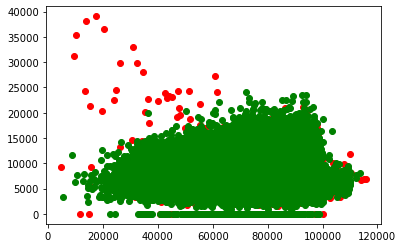

In [7]:
fig, ax = plt.subplots()
ax.scatter(df['VehOdo'].loc[df['IsBadBuy'] == 1], df['MMRCurrentRetailAveragePrice'].loc[df['IsBadBuy'] == 1], c='r')
ax.scatter(df['VehOdo'].loc[df['IsBadBuy'] == 0], df['MMRCurrentRetailAveragePrice'].loc[df['IsBadBuy'] == 0], c='g')

# Регрессия

![](../../images/linear_regression_animation.gif)

## 3a

Импортируйте из библиотеки `sklearn` все модели машинного обучения:

`from sklearn import *`

Трактуя задачу о предсказании наличия недостатков как задачу регрессии, натренируйте линейную модель [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) на каком-нибудь подмножестве признаков (например, тех же `VehOdo` и `MMRCurrentRetailAveragePrice`). 

С какой проблемой вы столкнулись? Какие способы ее решения вы можете предложить?

*Функции, которые могут пригодиться при решении: `.fit(), .loc[], pd.notnull()`*

*Создание модели:* `model1 = linear_model.LinearRegression()`

*Тренировка:*
`model1.fit(x, y)`



In [9]:
from sklearn import *

In [10]:
x = pd.DataFrame(df['VehOdo']).fillna(df['VehOdo'].mean())
y = pd.DataFrame(df['IsBadBuy']).fillna(1)
model1 = linear_model.LinearRegression()
model1.fit(x,y)

LinearRegression()

*Прокоменитруйте результат здесь:*

(Отредактируйте эту ячейку)

## 3b

Выполните предсказание для всех объектов обучающей выборки и присвойте результат переменной prediction

*Функции, которые могут пригодиться при решении: `model.predict()`*

In [11]:
prediction = model1.predict(x)

## 3c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Это можно сделать, например, используя list comprehensions: https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions 

`predictionClass = [1 if prediction[i] > 0.5 else 0 for i in range(prediction.shape[0])]`

In [12]:
predictionClass = [1 if prediction[i] > 0.5 else 0 for i in range(prediction.shape[0])]

## 3d

Постройте отчет по качеству классификации и матрицу ошибок. Как изменятся отчет и матрица ошибок, если изменить порог в задании 3c (по умолчанию его значение равно 0.5)?

*Функции, которые могут пригодиться при решении: `print(metrics.classification_report(...))`, `print(metrics.confusion_matrix(...))`*

Функция classification_report для каждого класса объектов считает точность (precision) в этом классе и полноту (recall). Полнота - это процент объектов данного класса, которые ваш метод предсказания тоже отнес к этому классу, среди всех объектов данного класса. Точность (precision) - то же самое, только среди всех объектов, предсказанных для этого класса.

Функция confusion_matrix возвращает матрицу с количествами объектов. Номера столбцов матрицы - это номера предсказанных классов, строки - это номера правильных классов. Например, элемент M[0,1] - это количество машин, где на самом деле IsBadBuy = 0, а вы предсказали 1.

In [13]:
print(metrics.classification_report(y,predictionClass))
print(metrics.confusion_matrix(y,predictionClass))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     64007
           1       0.00      0.00      0.00      8976

    accuracy                           0.88     72983
   macro avg       0.44      0.50      0.47     72983
weighted avg       0.77      0.88      0.82     72983

[[64007     0]
 [ 8976     0]]


C:\Users\VLAD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\VLAD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\VLAD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


С изменением порога и результаты будут смещаться  

# Классификация; Решающие деревья

![](../../images/tree.gif)

## 4a
Трактуя задачу как задачу классификации, постройте модель классификации «решающее дерево» глубины 20  (все аналогично линейной регрессии).


*Функции, которые могут пригодиться при решении: `tree.DecisionTreeClassifier(max_depth=20) `*

In [96]:
tr=tree.DecisionTreeClassifier(max_depth=20)
tr.fit(x,y)

DecisionTreeClassifier(max_depth=20)

## 4b

Решающее дерево предсказывает вероятности. С помощью построенной модели рассчитайте вероятности наличия скрываемых недостатков.

*Функции, которые могут пригодиться при решении: `model.predict_proba() `*

In [97]:
pred = tr.predict_proba(x)

## 4c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Постройте отчет о классификации и матрицу ошибок. Какой метод оказался лучше?

In [98]:
predClass = [1 if pred[i][0] > 0.5 else 0 for i in range(pred.shape[0])]

Данный метод (классификации) оказался лучше

# Кросс-валидация

![](../../images/cross_validation.png)

## 5a


Разделите исходную выборку на две части, например, используя [slices](https://pythonz.net/references/named/slice/):

`dataTrain = data.loc[0:34999,]
dataTest = data.loc[35000:69999,]`

In [99]:
part = df.shape[0]/2
xTrain = df['VehOdo'].loc[0:part,]
xTest = df['VehOdo'].loc[part:df.shape[0],]

## 5b

Проведите кросс-валидационный анализ https://scikit-learn.org/stable/modules/cross_validation.html

Проведите несколько экспериментов для различных глубин дерева. Напишите в комментариях, для каких глубин модель недообучена, для каких переобучена и где точка раннего останова.

*Функции, которые могут пригодиться при решении: `metrics.accuracy_score() `*

In [100]:
metrics.accuracy_score(y, predClass)

0.11302632119808723

20 - недообучена. 70 - недообучена. 110: ТРО. 150: переобучена.

# Решающая функция
## 6a

Вернемся к модели решающего дерева глубины 20, построенного по всей обучающей выборке `data`. Пусть цена ошибки неправильного предсказания 0 равна 1000, а неправильного предсказания 1 — 100.

Вычислите функцию потерь &mdash; среднюю ошибку на всей обучающей выборке.

In [101]:
avg=0
for i in range(len(pred)):
    if(y.values[i] > 0):
        avg+=max(0,(1-predClass[i])-predClass[i])
    if(y.values[i] == 0):
        avg+=max(0,predClass[i]-(1-predClass[i]))
        
avg/=len(pred)
avg

0.8869736788019128

## 6b

Выясните, как нужно изменить решающую функцию `[0 if predictionProb[i][0] > 0.5 else 1 for i in range(prediction.shape[0])]`, чтобы функция потерь была минимальна?

Найдите оптимальную решающую функцию и минимальное значение функционала потерь.
Вы можете решить эту задачу методом подбора, или посмотреть, какие Decision function существуют.


In [102]:
predClass=[0 if pred[i][0] > 0.5 else 1 for i in range(pred.shape[0])]

*Прокоменитруйте результат здесь:*

(Отредактируйте эту ячейку)